# LOAN APPROVAL CLASSIFICATION

In [1]:
#import needed libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Step 1: Simulate Loan Application Data

In [6]:

data=pd.read_csv('loan approval dataset.csv')
data.head()

,Applicant_Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Marital_Status,Loan_Status
0,4500,720,15000,36,Employed,Single,1
1,3800,650,12000,24,Self-Employed,Married,0
2,6000,780,25000,48,Employed,Married,1
3,2100,580,8000,12,Unemployed,Single,0
4,5200,730,20000,60,Employed,Married,1


In [7]:
# Step 2: Preprocessing
# Encode categorical variables

In [8]:
label_encoder = LabelEncoder()
data['Employment_Status'] = label_encoder.fit_transform(data['Employment_Status'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])  # 1: Approved, 0: Rejected

In [9]:
# Define features and target
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [10]:
# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [11]:
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 4: Train SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Linear Kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
# Step 5: Make Predictions
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test,y_pred))


Accuracy: 1.00
Confusion Matrix:
[[6 0]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



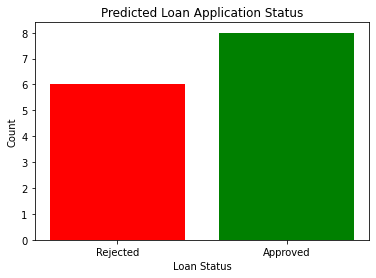

In [14]:
# Step 7: Visualization (Optional)
plt.figure(figsize=(6, 4))
plt.bar(['Rejected', 'Approved'], np.bincount(y_pred), color=['red', 'green'])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Predicted Loan Application Status")
plt.show()